In [2]:
# Add zpic library to path
import sys
sys.path.append("../../lib")

import em1d
import numpy
import em1d as ZPIC
import numpy as np
import matplotlib.pyplot as plt

## Matching exercise conditions

### From density.ipynb: Creating charged particle beams with custom density profiles

In [76]:
#Exercise variables created

ppc = 1000 # particles per cell

peakdensity_nbno = 0.1

# Simulation box
nx  = 500
box = 100

wcewp = 0.1

gamma0 = 10**5
ufl = [gamma0, 0, 0]   # Center of mass velocity, ultra-relativistic case 
 
uth = [0.0, 0.0, 0.0] # T=0

# Time step
dt = 0.018
tmax = 10

# Diagnostic frequency
ndump = 100

#Length of the transition
Length = 40 # Smooth transition => Length ~ >10; Sharp transition => Length ~ <1

# Defining ion and electron densities
def custom_positives(x):
    if x <= 50:
        return 1.0
    if 50 < x < 50 + Length:
        return 1.0-(x-50)/Length
    if x >= 50 + Length:
        return 0

def custom_electrons(x):
    if x <= 10:
        return 1.0
    if 10 < x <= 10.2:
        #return 1.0-(x-10)/0.2*peakdensity_nbno
        return 46 - 4.5*x
    if 10.2 < x <= 50:
        return 1.0
    if 50 <= x < 50+Length:
        return 1.0-(x-50)/Length
    if x >= 50+Length:
        return 0.0
    

# Density Profile
ramp_density_electrons = ZPIC.Density( type = "custom", custom = custom_electrons ) #Choosing ramp density to match exercise conditions
ramp_density_positives = ZPIC.Density( type = "custom", custom = custom_positives )

# Background plasma
electrons = ZPIC.Species( "electrons", -1.0, ppc, ufl = ufl, uth = uth, density = ramp_density_electrons)
positives = ZPIC.Species( "positrons",   2 , ppc, ufl = ufl, uth = uth, density = ramp_density_positives)

### Plot charge density


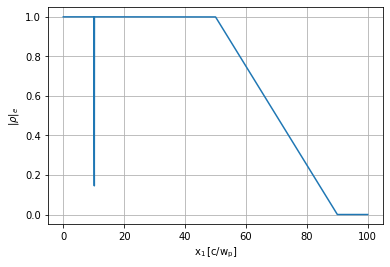

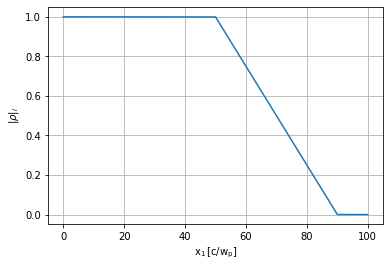

In [77]:
x1 = np.arange(0, 100, 0.01)
electrons_test = np.array([custom_electrons(x) for x in x1])
positives_test = np.array([custom_positives(x) for x in x1])


plt.plot(x1, electrons_test) 
xlabel = "x_1\,[{c/w_p}]"
plt.xlabel(r'$\sf{' + xlabel + r'}$')
plt.ylabel(r"|$\rho$|$_e$")
#plt.title("Electron density\nt = {:g}".format(sim.t))
plt.grid(True)
plt.show()


plt.plot(x1, positives_test)
xlabel = "x_1\,[{c/w_p}]"
plt.xlabel(r'$\sf{' + xlabel + r'}$')
plt.ylabel(r"|$\rho$|$_i$")
#plt.title("Ion density\nt = {:g}".format(sim.t))
plt.grid(True)
plt.show()

## Unmagnetized Plasma

### From External Fields.ipynb:  to add an external magnetic field.

In [78]:
# Add external fields

Bz = [0.0, 0.0, 0.0]

ext = ZPIC.ExternalField(B_type = 'uniform', B_0 = Bz) # Bz = 0.0


### Run Simulation

In [79]:
# Initialize simulation data
sim = ZPIC.Simulation( nx, box, dt, species = (electrons,positives) ) 
#sim = ZPIC.Simulation( nx, box, dt, species = electrons) 

# External added fields 
sim.emf.set_ext_fld(ext)

# Set moving window
sim.set_moving_window()

# Run the simulation
sim.run( tmax )


Running simulation up to t = 10 ...
n = 556, t = 10.008
Done.


### Plot charge density

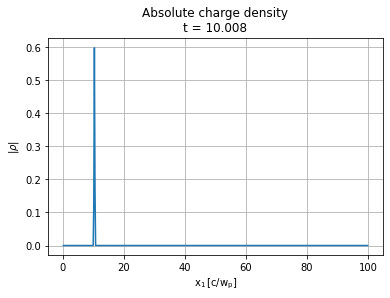

In [80]:
charge = np.abs(electrons.charge()+positives.charge())
#charge = np.abs(electrons.charge())

xmin = sim.dx/2
xmax = sim.box - sim.dx/2

plt.plot(np.linspace(xmin, xmax, num = sim.nx), charge) 
xlabel = "x_1\,[{c/w_p}]"
plt.xlabel(r'$\sf{' + xlabel + r'}$')
plt.ylabel(r"|$\rho$|")
#plt.xlim([0, 20])
#plt.ylim([.9, 1.1])
plt.title("Absolute charge density\nt = {:g}".format(sim.t))
plt.grid(True)
plt.show()

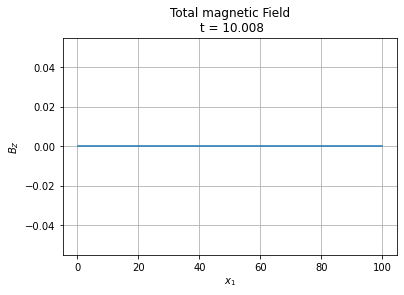

In [81]:
# Plot field values at the center of the cells
xmin = sim.emf.dx/2
xmax = sim.emf.box - sim.emf.dx/2

plt.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.Bz_part )
plt.xlabel("$x_1$")
plt.ylabel("$B_Z$")
plt.title("Total magnetic Field\n t = {:g}".format(sim.t))
plt.grid(True)
plt.show()


### From Direct.ipynb:  to plot Ex and Ey.

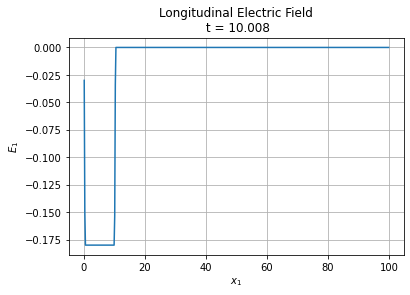

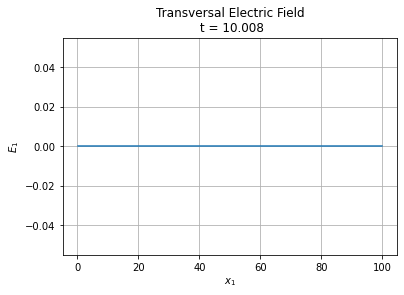

In [82]:
# Plot field values at the center of the cells
xmin = sim.emf.dx/2
xmax = sim.emf.box - sim.emf.dx/2

plt.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.Ex )
plt.xlabel("$x_1$")
plt.ylabel("$E_1$")
plt.title("Longitudinal Electric Field\n t = {:g}".format(sim.t))
plt.grid(True)
plt.show()

plt.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.Ey )
plt.xlabel("$x_1$")
plt.ylabel("$E_1$")
plt.title("Transversal Electric Field\n t = {:g}".format(sim.t))
plt.grid(True)
plt.show()

## Magnetized Plasma

### From External Fields.ipynb:  to add an external magnetic field.

In [83]:
# Add external fields

Bz = [0.0, 0.0, 0.1]
ext = ZPIC.ExternalField(B_type = 'uniform', B_0 = Bz) # Bz = 0.1

### Run Simulation

In [84]:
# Initialize simulation data
sim = ZPIC.Simulation( nx, box, dt, species = (electrons,positives) ) 
#sim = ZPIC.Simulation( nx, box, dt, species = electrons) 

# External added fields 
sim.emf.set_ext_fld(ext)

# Set moving window
sim.set_moving_window()

# Run the simulation
sim.run( tmax )


Running simulation up to t = 10 ...
n = 556, t = 10.008
Done.


### Plot charge density

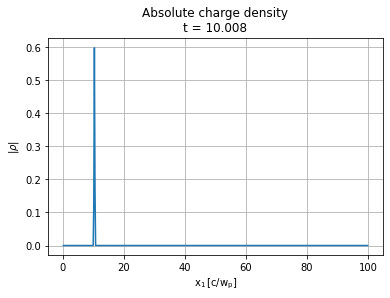

In [85]:
charge = np.abs(electrons.charge()+positives.charge())
#charge = np.abs(electrons.charge())

xmin = sim.dx/2
xmax = sim.box - sim.dx/2

#plt.plot(x, custom_electrons(x)) 

plt.plot(np.linspace(xmin, xmax, num = sim.nx), charge) 
xlabel = "x_1\,[{c/w_p}]"
plt.xlabel(r'$\sf{' + xlabel + r'}$')
plt.ylabel(r"|$\rho$|")
plt.title("Absolute charge density\nt = {:g}".format(sim.t))
plt.grid(True)
plt.show()

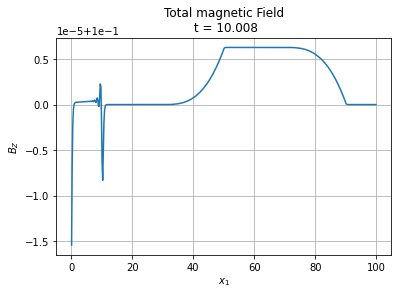

In [86]:
# Plot field values at the center of the cells
xmin = sim.emf.dx/2
xmax = sim.emf.box - sim.emf.dx/2

plt.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.Bz_part )
plt.xlabel("$x_1$")
plt.ylabel("$B_Z$")
plt.title("Total magnetic Field\n t = {:g}".format(sim.t))
plt.grid(True)
plt.show()

### From Direct.ipynb:  to plot Ex and Ey.

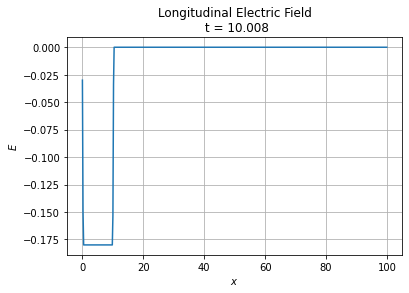

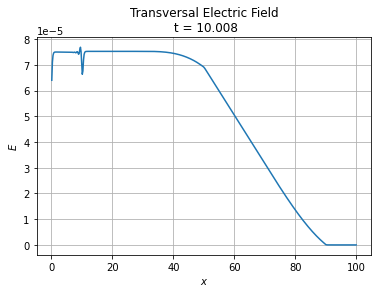

In [90]:
# Plot field values at the center of the cells
xmin = sim.emf.dx/2
xmax = sim.emf.box - sim.emf.dx/2

plt.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.Ex )
plt.xlabel("$x$")
plt.ylabel("$E$")
"""plt.xlim([30, 75])
plt.ylim([-.005, .005])"""
plt.title("Longitudinal Electric Field\n t = {:g}".format(sim.t))
plt.grid(True)
plt.show()

plt.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.Ey )
plt.xlabel("$x$")
plt.ylabel("$E$")
"""plt.xlim([30, 75])
plt.ylim([.19, .21])"""
plt.title("Transversal Electric Field\n t = {:g}".format(sim.t))
plt.grid(True)
plt.show()

 #### As predicted, ZPIC confirmed what was already stated in question a). When there is no magnetized plasma, there is no Cherenkov radiation emitted, no electric field. But, when the case is the opposite, as demonstrated, the electric field exists attenuating to null, as there is Chrenkov emission. 